<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.456077,55.411657,79.542177,45.080072,278.489983,241.874656,36.615327
1,0.0,1.0,83.757373,38.169304,67.682594,-21.574667,178.034604,207.064233,-29.029629
2,0.0,2.0,44.648659,80.925374,74.154127,10.860639,220.588798,213.443544,7.145253
3,0.0,3.0,31.213815,31.689334,80.052018,13.935331,166.890498,157.856530,9.033968
4,0.0,4.0,51.162076,96.769346,31.307822,-9.864883,179.374361,188.548942,-9.174581
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.446425,45.729301,37.702548,-13.039125,140.839149,154.018361,-13.179211
119996,999.0,116.0,34.218430,73.134523,51.988492,-39.228259,130.113185,164.520769,-34.407584
119997,999.0,117.0,43.875437,48.944090,93.519557,27.226080,223.565165,197.553689,26.011476
119998,999.0,118.0,31.763759,94.301593,28.977407,-62.118135,102.924624,155.424855,-52.500231


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.456077,55.411657,79.542177,45.080072,278.489983,241.874656,36.615327
1,0.0,1.0,83.757373,38.169304,67.682594,-21.574667,178.034604,207.064233,-29.029629
2,0.0,2.0,44.648659,80.925374,74.154127,10.860639,220.588798,213.443544,7.145253
3,0.0,3.0,31.213815,31.689334,80.052018,13.935331,166.890498,157.856530,9.033968
4,0.0,4.0,51.162076,96.769346,31.307822,-9.864883,179.374361,188.548942,-9.174581
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.446425,45.729301,37.702548,-13.039125,140.839149,154.018361,-13.179211
119996,999.0,116.0,34.218430,73.134523,51.988492,-39.228259,130.113185,164.520769,-34.407584
119997,999.0,117.0,43.875437,48.944090,93.519557,27.226080,223.565165,197.553689,26.011476
119998,999.0,118.0,31.763759,94.301593,28.977407,-62.118135,102.924624,155.424855,-52.500231


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.456077,55.411657,79.542177,45.080072,278.489983,241.874656,36.615327
1,0.0,1.0,83.757373,38.169304,67.682594,-21.574667,178.034604,207.064233,-29.029629
2,0.0,2.0,44.648659,80.925374,74.154127,10.860639,220.588798,213.443544,7.145253
3,0.0,3.0,31.213815,31.689334,80.052018,13.935331,166.890498,157.856530,9.033968
4,0.0,4.0,51.162076,96.769346,31.307822,-9.864883,179.374361,188.548942,-9.174581
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.446425,45.729301,37.702548,-13.039125,140.839149,154.018361,-13.179211
119996,999.0,116.0,34.218430,73.134523,51.988492,-39.228259,130.113185,164.520769,-34.407584
119997,999.0,117.0,43.875437,48.944090,93.519557,27.226080,223.565165,197.553689,26.011476
119998,999.0,118.0,31.763759,94.301593,28.977407,-62.118135,102.924624,155.424855,-52.500231


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    88.456077  55.411657  79.542177  ...  278.489983  241.874656  36.615327
      1.0    83.757373  38.169304  67.682594  ...  178.034604  207.064233 -29.029629
      2.0    44.648659  80.925374  74.154127  ...  220.588798  213.443544   7.145253
      3.0    31.213815  31.689334  80.052018  ...  166.890498  157.856530   9.033968
      4.0    51.162076  96.769346  31.307822  ...  179.374361  188.548942  -9.174581
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  60.446425  45.729301  37.702548  ...  140.839149  154.018361 -13.179211
      116.0  34.218430  73.134523  51.988492  ...  130.113185  164.520769 -34.407584
      117.0  43.875437  48.944090  93.519557  ...  223.565165  197.553689  26.011476
      118.0  31.763759  94.301593  28.977407  ...  102.924624  155.424855 -52.500231
      119.0  96.449761  45.075649  63.374032  ...  227.495330  216.294867  11.200463

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

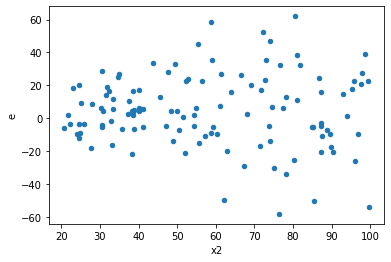

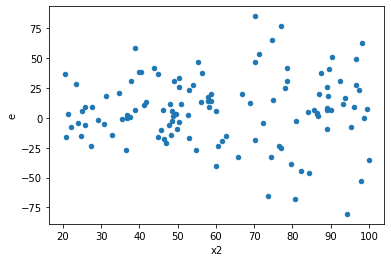

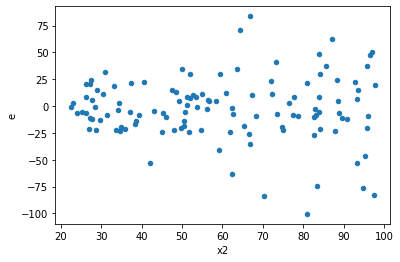

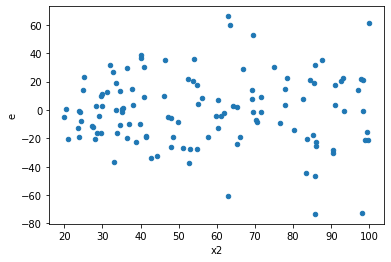

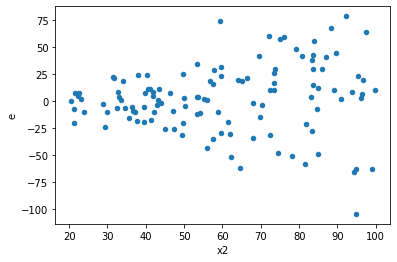

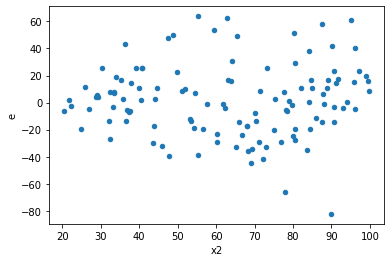

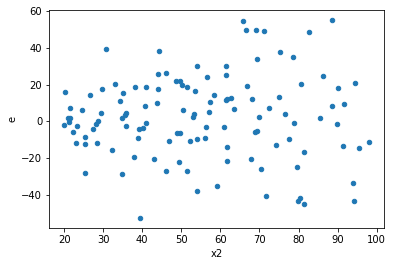

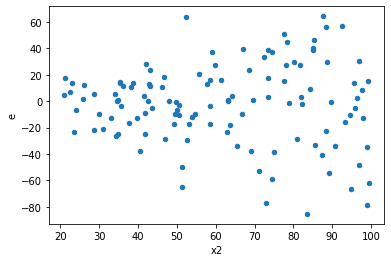

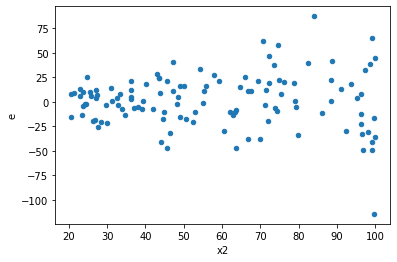

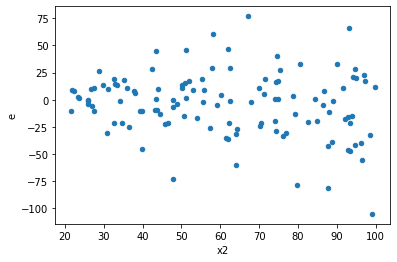

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,33867.12129183244,7631.641951696887,769.7073020871009,173.44640799311108,4.437724084304311,1.8741288456691763e-06,0.9999990629355772,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,56766.333951763154,17634.110913473876,1290.1439534491626,400.7752480334972,3.219120840869222,0.00014650222576495509,0.9999267488871175,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,65808.3226419926,14229.008703937208,1495.6436964089228,323.38656145311836,4.624940781980354,1.0173738227425844e-06,0.9999994913130886,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,35721.617515325685,15984.9663832621,811.8549435301292,363.2946905286841,2.2347008219379103,0.008110361335496474,0.9959448193322518,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,78737.04843522391,9513.2338791468,1789.4783735278163,216.20986088969997,8.276580754291883,6.891531789676719e-11,0.9999999999655423,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,33135.57154128596,22486.44194002903,753.0811713928626,511.05549863702345,1.4735800190024715,0.19733852800911023,0.9013307359954449,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,32777.44746644482,14123.114255409757,744.9419878737459,320.97986944113086,2.3208370953941446,0.005629822849159805,0.9971850885754201,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,73688.3141758678,15657.034368119772,1674.7344130879044,355.84169018454025,4.706403041811608,7.83417124505803e-07,0.9999996082914377,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,56790.85838367857,10470.744025320924,1290.7013269017857,237.9714551209301,5.423765326164389,8.765585302050738e-08,0.9999999561720735,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,33867.12129183244,7631.641951696887,769.7073020871009,173.44640799311108,4.437724084304311,1.8741288456691763e-06,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,56766.333951763154,17634.110913473876,1290.1439534491626,400.7752480334972,3.219120840869222,0.00014650222576495509,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,65808.3226419926,14229.008703937208,1495.6436964089228,323.38656145311836,4.624940781980354,1.0173738227425844e-06,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,35721.617515325685,15984.9663832621,811.8549435301292,363.2946905286841,2.2347008219379103,0.008110361335496474,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,78737.04843522391,9513.2338791468,1789.4783735278163,216.20986088969997,8.276580754291883,6.891531789676719e-11,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,33135.57154128596,22486.44194002903,753.0811713928626,511.05549863702345,1.4735800190024715,0.19733852800911023,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,32777.44746644482,14123.114255409757,744.9419878737459,320.97986944113086,2.3208370953941446,0.005629822849159805,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,73688.3141758678,15657.034368119772,1674.7344130879044,355.84169018454025,4.706403041811608,7.83417124505803e-07,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,56790.85838367857,10470.744025320924,1290.7013269017857,237.9714551209301,5.423765326164389,8.765585302050738e-08,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    937
Reject001=1 : Homoscedasticity       63
Name: Result_test, dtype: int64